Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

# Lab 4.1: Lexical Resources

In this lab, we will query lexical information from [Babelnet](https://babelnet.org/). It is a multilingual collection of multiple resources, for example WordNet and Wiktionary. We will also learn how to plot networks.

You first need to [register](https://babelnet.org/register) to obtain an API key. Please use your student e-mail address. It is easier, if you specify English as your native language (this will be the interface language). 

Before you start, explore the browser search interface to understand what type of information Babelnet can provide. 

A word can have multiple senses and a sense can be referred to by multiple words. Babelnet organizes concepts as synsets which are groups of synonyms referring to the same sense. As a first step, you need to obtain the synset ids for your search term. 

## 1. Synsets

In [1]:
import requests

# Query
word = "dinner"
language = "EN"

# Babelnet parameters, please add your own key here!
babelnet_key = "312361a5-dba7-4f8a-be50-f65bfd52289f"
wordurl = "https://babelnet.io/v5/getSynsetIds?"
params = dict(lemma=word, searchLang=language,key=babelnet_key)

# Get all synsets for the word
resp = requests.get(url=wordurl, params=params)
word_data = resp.json()

print(word_data)

[{'id': 'bn:02914539n', 'pos': 'NOUN', 'source': 'BABELNET'}, {'id': 'bn:00026000n', 'pos': 'NOUN', 'source': 'BABELNET'}, {'id': 'bn:15595117n', 'pos': 'NOUN', 'source': 'BABELNET'}, {'id': 'bn:00075315n', 'pos': 'NOUN', 'source': 'BABELNET'}, {'id': 'bn:00027207n', 'pos': 'NOUN', 'source': 'BABELNET'}, {'id': 'bn:00001877n', 'pos': 'NOUN', 'source': 'BABELNET'}, {'id': 'bn:14188629n', 'pos': 'NOUN', 'source': 'BABELNET'}, {'id': 'bn:16886640n', 'pos': 'NOUN', 'source': 'BABELNET'}, {'id': 'bn:00027206n', 'pos': 'NOUN', 'source': 'BABELNET'}]


Now, you can query the information for each synset id. Note that the definitions of the synsets are a mix of different sources and target languages. **How can you adjust the code to filter by source or language?** 


In [2]:
# Get the information for each synset of the word
synseturl= "https://babelnet.io/v5/getSynset?"

# We can specify multiple target languages
languages =["EN", "ES", "NL"]
synsets ={}

for synset in word_data:
    id = synset["id"]
    pos = synset["pos"]
    synset_params = dict(id=id,key=babelnet_key, targetLang=languages)

    resp = requests.get(url=synseturl, params=synset_params)
    synsetdata = resp.json()
    
    # Output the definitions for each synset
    print("Synset: ", str(id), str(pos) )
    for definition in synsetdata["glosses"]: 
        print("\t",definition["source"], definition["language"], definition["gloss"])
        print()
    print("-----------")
    
    synsets[id] = synsetdata
    




Synset:  bn:02914539n NOUN
	 WIKI EN Dinner is a 2002 play by the British dramatist Moira Buffini.

-----------
Synset:  bn:00026000n NOUN
	 WN EN A midday meal

	 WIKI EN Tiffin is an Indian English word for a type of meal.

	 WIKI EN Lunch, the abbreviation for luncheon, is a meal typically eaten at midday.

	 WIKIDIS EN A light meal eaten during the day

	 WIKIDATA EN Light meal or lunch

	 WIKIDATA EN Meal, usually served at noon

	 OMWIKI EN Meal usually eaten at midday.

	 WIKT EN A midday meal .

	 WIKT EN A light meal usually eaten around midday, notably when not as main meal of the day.

	 WIKT EN A midday meal or snack; luncheon.

	 WIKT EN A formal meal served in the middle of the day.

	 WIKI NL De middagmaaltijd of lunch is de maaltijd die gegeten wordt rond het midden van de dag, meestal tussen 11 en 14 uur.

	 OMWIKI NL Maaltijd gewoonlijk 's middags gegeten.

	 MCR_ES ES Comida de medio día.

	 WIKI ES Tiffin es un almuerzo ligero típico de la India británica.

	 WIKI E

## 2. Word sense disambiguation

Identifying the most suitable synset for a word in a specific context is called *word sense disambiguation*. **Which of the retrieved synsets are most relevant for your dataset? How do you know?** 

A very simple algorithm for identifying the synset of a term calculates the overlap between the words occurring in the context of the term and the words occurring in the definition of the synset. The idea is called [Simplified Lesk Algorithm](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.178.2744&rep=rep1&type=pdf). It can be improved by ignoring function words, considering the POS of the word, lemmatizing the tokens and by including the words in the example sentences. **What do you think about this approach? Is it useful?**


In [8]:
import string
# Simple example, already tokenized and no punctuation
language ="EN"
context = "we will have pasta for dinner tomorrow evening"
context_tokens = context.split(" ")

max_overlap = 0
best_synset = ""
best_definition = ""
for synset_id, properties in synsets.items(): 
    
        for definition in properties["glosses"]:
            if definition["language"]==language:
                # Remove punctuation
                gloss = definition["gloss"]
                for c in string.punctuation:
                    gloss=gloss.replace(c,"")
                gloss_tokens = gloss.split(" ")

                # Calculate overlap
                overlap = set(gloss_tokens).intersection(context_tokens)
                print(gloss_tokens)
                print(overlap)
                print()

                # Update best synset
                if (len(overlap)>max_overlap):
                    max_overlap = len(overlap)
                    best_synset = synset_id
                    best_definition = gloss
    
print(best_synset, best_definition)
    




['Dinner', 'is', 'a', '2002', 'play', 'by', 'the', 'British', 'dramatist', 'Moira', 'Buffini']
set()

['A', 'midday', 'meal']
set()

['Tiffin', 'is', 'an', 'Indian', 'English', 'word', 'for', 'a', 'type', 'of', 'meal']
{'for'}

['Lunch', 'the', 'abbreviation', 'for', 'luncheon', 'is', 'a', 'meal', 'typically', 'eaten', 'at', 'midday']
{'for'}

['A', 'light', 'meal', 'eaten', 'during', 'the', 'day']
set()

['Light', 'meal', 'or', 'lunch']
set()

['Meal', 'usually', 'served', 'at', 'noon']
set()

['Meal', 'usually', 'eaten', 'at', 'midday']
set()

['A', 'midday', 'meal', '']
set()

['A', 'light', 'meal', 'usually', 'eaten', 'around', 'midday', 'notably', 'when', 'not', 'as', 'main', 'meal', 'of', 'the', 'day']
set()

['A', 'midday', 'meal', 'or', 'snack', 'luncheon']
set()

['A', 'formal', 'meal', 'served', 'in', 'the', 'middle', 'of', 'the', 'day']
set()

['A', 'light', 'evening', 'meal', 'served', 'in', 'early', 'evening', 'if', 'dinner', 'is', 'at', 'midday', 'or', 'served', 'late', '

## 3. Synset properties

Babelnet provides a lot of additional information for each synset. You might want to check the browser interface again. 

In [9]:
example_id = "bn:00027206n" 

print(synsets[example_id].keys())


dict_keys(['senses', 'wnOffsets', 'mainSense', 'glosses', 'examples', 'images', 'synsetType', 'categories', 'translations', 'domains', 'lnToCompound', 'lnToOtherForm', 'filterLangs', 'bkeyConcepts'])


In [10]:
for sense in synsets[example_id]["senses"]:
    print(sense["properties"]["source"], sense["properties"]["language"],sense["properties"]["simpleLemma"])


WN EN dinner
MCR_ES ES cena
MCR_ES ES comida
OMWN_NL NL avondeten
OMWN_NL NL avondmaal
OMWN_NL NL avondmaaltijd
OMWN_NL NL diner
OMWN_NL NL eten
OMWN_NL NL etentje
OMWN_NL NL middageten
WIKI EN dinner
WIKIDATA ES comida
WIKIDATA NL diner
WIKIDATA EN Dinner
OMWIKI NL avondeten
OMWIKI NL avondmaal
OMWIKI ES cena
OMWIKI NL diner
OMWIKI EN dinner
OMWIKI EN evening_meal
OMWIKI NL middagmaal
OMWIKI EN supper
OMWIKI EN tea
WIKT NL avondeten
WIKT NL avondmaal
WIKT NL avondmaaltijd
WIKT ES cena
WIKT EN dinner
WIKT NL eten
WIKIQU EN dinner
WIKIRED EN Dinner/Archive_1
WIKIRED EN Het_Diner
WIKIRED EN The_Diner
WNTR ES cena
WNTR NL diner
WIKITR ES cena
WIKITR NL diner


In [11]:
for translation in synsets[example_id]["translations"]: 
    source = translation[0]["properties"]
    print(source["language"], source["simpleLemma"])
    
    for target in translation[1]:
        print("\t",target["properties"]["language"], target["properties"]["simpleLemma"], target["properties"]["pronunciations"]["transcriptions"])
        
    print("-----------")

NL diner
	 EN dinner ['[/ˈdɪnə(ɹ)/]', '[/ˈdɪnɚ/]']
-----------
NL diner
	 ES cena ['[/ˈsena/]', '[/ˈθena/]']
-----------
EN dinner
	 NL diner []
	 ES cena ['[/ˈsena/]', '[/ˈθena/]']
-----------
ES cena
	 EN dinner ['[/ˈdɪnə(ɹ)/]', '[/ˈdɪnɚ/]']
	 NL diner []
-----------


## 4. Synset relations

We can also identify relations between synsets. **Brainstorm: Could you recursively identify relations between the important terms in your dataset?**

In [33]:
relations_url= 'https://babelnet.io/v5/getOutgoingEdges?'
relations_params = dict(id=example_id,key=babelnet_key)
resp = requests.get(url=relations_url, params=relations_params)
    
relations_data = resp.json()
for relation in relations_data: 
    print(relation["pointer"]["name"], relation["target"])
    print()


Hyponym bn:01861506n

Hyponym bn:05473841n

Hyponym bn:06181680n

Derivationally related form bn:00086843v

Derivationally related form bn:00086844v

Hyponym bn:00044091n

Hypernym bn:00053993n

Gloss related form (monosemous) bn:00044075n

Gloss related form (disambiguated) bn:00000086n

Gloss related form (disambiguated) bn:00031998n

Gloss related form (disambiguated) bn:00044075n

Gloss related form (disambiguated) bn:00053993n

Gloss related form (disambiguated) bn:00099598a

has_part bn:00023289n

subclass_of bn:18019277n

Hyponym bn:00026000n

Hypernym bn:00053993n

Semantically related form bn:00000168n

Semantically related form bn:00001877n

Semantically related form bn:00001880n

Semantically related form bn:00004709n

Semantically related form bn:00004856n

Semantically related form bn:00005048n

Semantically related form bn:00008433n

Semantically related form bn:00008522n

Semantically related form bn:00010183n

Semantically related form bn:00010407n

Semantically related

## 5. Plotting networks

The relations between concepts can be interpreted as a network graph. In python, such graphs can be created using the *networkx* module. **What kind of information can you derive from such a network about the terms in your dataset? Would it be possible to create a deeper network and draw relation edges from the target nodes?**

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Map id to lemma
def get_lemma(id): 
    synset_params = dict(id=id,key=babelnet_key, targetLang=languages)
    resp = requests.get(url=synseturl, params=synset_params)
    synsetdata = resp.json()
    # We simply take the first sense
    try: 
        lemma = synsetdata["senses"][0]["properties"]["simpleLemma"]
    except IndexError: 
        # Sometimes concept information is missing
        lemma = ""
    return lemma

# Create a graph structure
relations_graph=nx.Graph()
relations_graph.add_node(word)

# Add edges
for relation in relations_data[0:10]: 
    target = get_lemma(relation["target"])
    if (len(target))>0:
        relations_graph.add_edge(word, target,title=relation["pointer"]["name"])

print(relations_graph.nodes)
print(relations_graph.edges)


['dinner', 'Full_course_dinner', 'dine', 'high_tea', 'meal', 'noon', 'day', 'evening']
[('dinner', 'Full_course_dinner'), ('dinner', 'dine'), ('dinner', 'high_tea'), ('dinner', 'meal'), ('dinner', 'noon'), ('dinner', 'day'), ('dinner', 'evening')]


Now, we are going to plot the network using *matplotlib.pyplot*. This is a very useful library for all kinds of plots. **Take a look at some [plot galleries](https://python-graph-gallery.com/all-charts/) to get a feeling for the range of plots you can create.** 

<ipython-input-42-fe010cfff24a>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


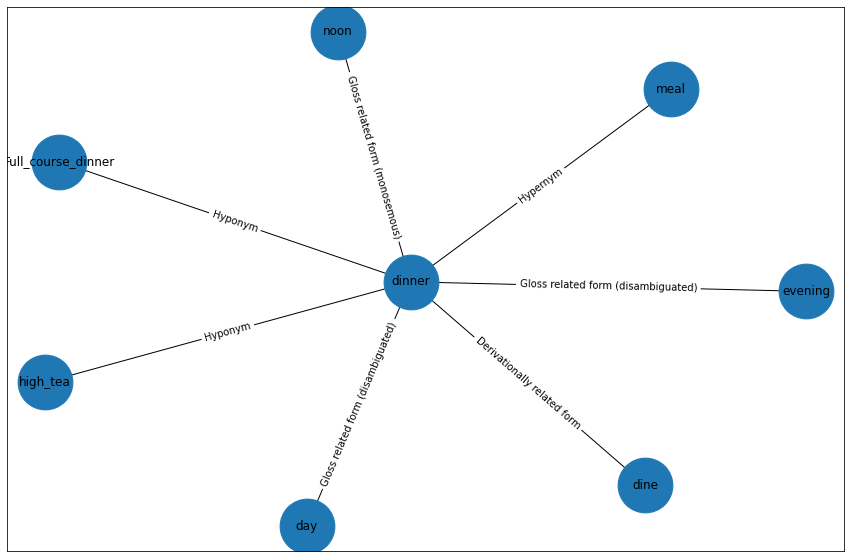

In [42]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure
fig, ax = plt.subplots(1, 1, figsize = (15, 10))

# Need to create a layout when doingseparate calls to draw nodes and edges
pos = nx.spring_layout(relations_graph)


# Draw the nodes
nx.draw_networkx_nodes(relations_graph, pos, node_size = 3000, ax=ax)
nx.draw_networkx_labels(relations_graph, pos, ax=ax)

# Draw the edges
edge_labels = nx.get_edge_attributes(relations_graph, 'title')

nx.draw_networkx_edges(relations_graph, pos, arrows=True, ax=ax)
nx.draw_networkx_edge_labels(relations_graph,pos, edge_labels=edge_labels)


fig.show()


## 6. Adding color

We want to add color to the plot. First, we distinguish between the root node and the targets. 

['red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow']


<ipython-input-43-8c1b8a68c7ba>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


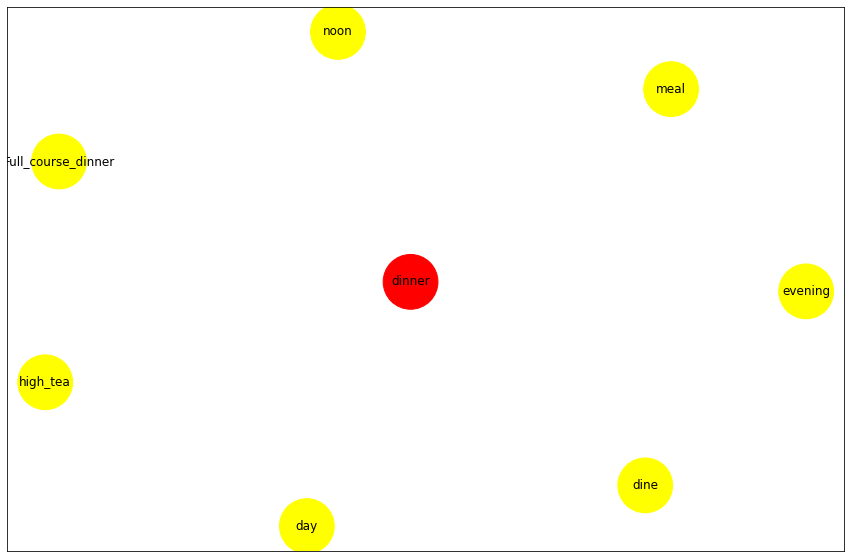

In [43]:
# Create a figure
fig, ax = plt.subplots(1, 1, figsize = (15, 10))

# Specify the node colors
node_colors = ["yellow" for node in relations_graph.nodes]
# The first node should be red
node_colors[0] = "red"
print(node_colors)
# Draw the nodes
nx.draw_networkx_nodes(relations_graph, pos, node_color=node_colors, node_size = 3000, ax=ax)
nx.draw_networkx_labels(relations_graph, pos, ax=ax)

fig.show()


## 7. Using color palettes

Instead of choosing the colors yourself, you can use existing color palettes. The module *seaborn* provides very nice [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html). Colors are expressed as three numbers indicating the values for red, green, and blue (RGB).

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667), (0.8509803921568627, 0.37254901960784315, 0.00784313725490196), (0.4588235294117647, 0.4392156862745098, 0.7019607843137254), (0.9058823529411765, 0.1607843137254902, 0.5411764705882353), (0.4, 0.6509803921568628, 0.11764705882352941), (0.9019607843137255, 0.6705882352941176, 0.00784313725490196), (0.6509803921568628, 0.4627450980392157, 0.11372549019607843), (0.4, 0.4, 0.4)]


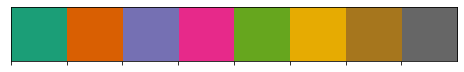

In [44]:
import seaborn as sns
color_palette = sns.color_palette("Dark2")
sns.palplot(color_palette)
print(color_palette)


We want to use different colors for the edges depending on the edge label. **Is it possible to also specify the same color for the node?** 

<ipython-input-45-c7726006c1e2>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


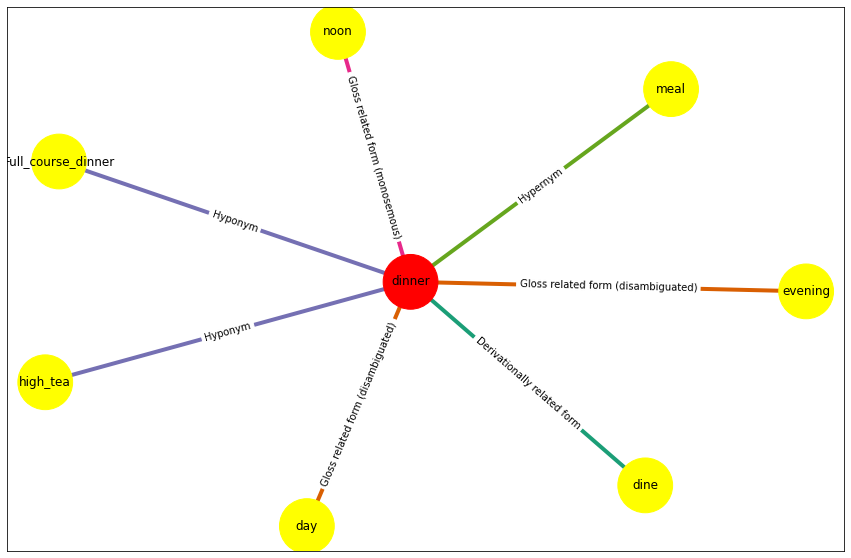

In [45]:

# Map edge labels to colors
unique_labels = set(list(edge_labels.values()))
labels2color= {label:color_palette[i] for i, label in enumerate(unique_labels)} 
edge_colors=[labels2color[label] for label in edge_labels.values()]

# Create a figure
fig, ax = plt.subplots(1, 1, figsize = (15, 10))

# Draw the nodes and edges with colors
nx.draw_networkx_nodes(relations_graph, pos, node_color=node_colors, node_size = 3000, ax=ax)
nx.draw_networkx_labels(relations_graph, pos, ax=ax)

# Note that I also increased the width of the edges. 
nx.draw_networkx_edges(relations_graph, pos, arrows=True, edge_color=edge_colors, width=4, ax=ax)
nx.draw_networkx_edge_labels(relations_graph,pos, edge_labels=edge_labels)


fig.show()


If you are happy with your graph, save it to a file. **Be careful: one can spend a lot of time trying to improve a plot!** Good enough is good enough.  

In [46]:
fig.savefig("example_plot.png")